# Chapter 2- Group Exercise 2 - Regression Analysis and Feature Selection
## Kaggle datasource : https://www.kaggle.com/datasets/asadullahcreative/e-commerce-microphone-marketplace-dataset

# PART 1: Handle Missing Values & Outliers  (Done by Saniya Shaikh)

## Loading Dataset (Done by Saniya Shaikh)

In [22]:
import pandas as pd
import numpy as np




In [23]:
df = pd.read_excel("../data/microphone_data.xlsx")
df.shape


(1360, 30)

## Handling Missing Values (Done by Saniya Shaikh)

In [24]:
df.isnull().sum()


serial no                   0
title                       0
price                       0
sold_count                  0
rating                      0
review_count                0
location                    0
seller_name                 0
category                  150
original_price              0
discount_percent            0
is_discounted               0
discount_category           0
price_tier                  0
price_per_rating            0
popularity_score            0
review_rate                 0
value_score                 0
price_vs_category_avg     150
is_top_rated              150
seller_tier               782
seller_avg_rating           0
seller_total_sales          0
discount_effectiveness      0
market_position             0
review_density              0
virality_score              0
price_capped                0
sold_count_capped           0
review_count_capped         0
dtype: int64

## Separating numerical & categorical features (Done by Saniya Shaikh)

In [25]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns


## Imputing missing values (Done by Saniya Shaikh)

In [26]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


## Handling Outliers (Done by Saniya Shaikh)

In [27]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean


In [28]:
df = remove_outliers_iqr(df, num_cols)
df.shape


(343, 30)

# Part 2 Feature Scaling (Standardization) (Done by Saniya Shaikh)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# Part 3  Feature Selection (Done by Saniya Shaikh)

In [7]:
target = "sold_count"

X = df.drop(columns=[target])
y = df[target]



NameError: name 'df' is not defined

In [ ]:
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)


In [ ]:
#Selecting top features 
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X, y)


In [ ]:
selected_features = X.columns[selector.get_support()]
selected_features


Index(['category_W', 'category_WIRELESS MIC K',
       'category_WOE LAVALIER MICROPHONE ', 'category_X', 'category_XO MKF ',
       'category_Y', 'category_YOGA M', 'discount_category_low',
       'discount_category_medium', 'discount_category_none',
       'price_tier_luxury', 'price_tier_mid', 'price_tier_premium',
       'seller_tier_Growing', 'seller_tier_Starter', 'seller_tier_Top Seller',
       'discount_effectiveness_No Heavy Discount',
       'market_position_luxury_High', 'market_position_mid_High',
       'market_position_premium_High'],
      dtype='object')

### Preprocessing Summary
- Missing values were handled using median (numerical) and mode (categorical) imputation.
- Outliers were treated using the IQR method to reduce the influence of extreme values.
- Numerical features were standardized to ensure equal contribution during learning.
- Feature selection was applied using SelectKBest to retain the most relevant features.


## 3. Enhance the model (Done by Sakshi Manjrekar)

## Part 1. Experiment with feature selection techniques and analyze their impact (Done by Sakshi Manjrekar)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
# target variable
target = "sold_count"

# selecting numeric features
X = data.select_dtypes(include=["int64", "float64", "bool"]).drop(columns=[target])
y = data[target]

In [ ]:
#baseline model (before feature selection)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

y_pred_base = baseline_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_base))
print("Baseline RMSE:", rmse)
print("Baseline R²:", r2_score(y_test, y_pred_base))



Baseline RMSE: 10.2828240034192
Baseline R²: 0.9973845825901304


In [ ]:
#feature selection using feature importance

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": baseline_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
18,sold_count_capped,6.716941e-01
8,popularity_score,2.596459e-01
19,review_count_capped,3.934443e-02
3,review_count,2.687758e-02
10,value_score,1.203654e-03
14,seller_total_sales,5.120921e-04
16,virality_score,8.690123e-05
9,review_rate,8.568800e-05
15,review_density,8.306863e-05
1,price,7.899126e-05


## Part 2. Visualizing results (Done by Sakshi Manjrekar)

Visualization: Feature Importance (Done by Sakshi manjrekar)

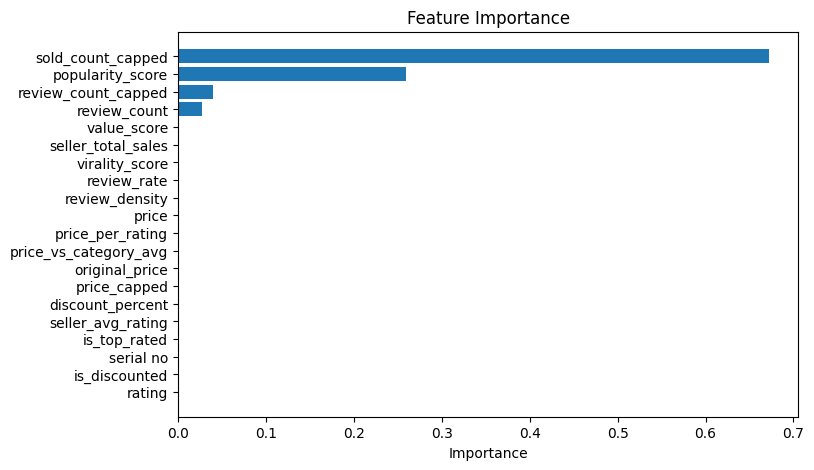

In [19]:
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
# retraining model using selected features

# selectimng top 5 most important features
top_features = importance_df["Feature"].head(5)

X_top = X[top_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

fs_model = RandomForestRegressor(random_state=42)
fs_model.fit(X_train, y_train)

y_pred_fs = fs_model.predict(X_test)

rmse_fs = np.sqrt(mean_squared_error(y_test, y_pred_fs))
print("After Feature Selection RMSE:", rmse_fs)
print("After Feature Selection R²:", r2_score(y_test, y_pred_fs))

After Feature Selection RMSE: 11.011935219543009
After Feature Selection R²: 0.997000537057039


Visualization: Residual Plot (Done by Sakshi Manjrekar)

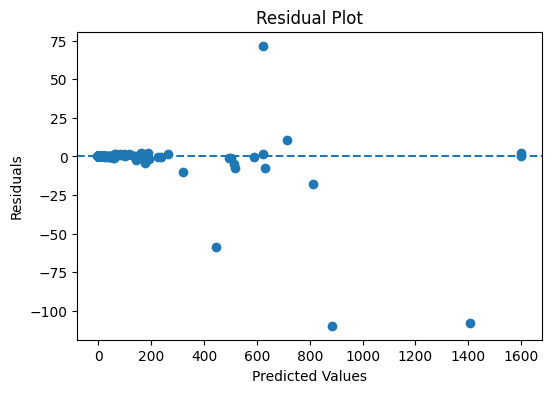

In [22]:
residuals = y_test - y_pred_fs

plt.figure(figsize=(6,4))
plt.scatter(y_pred_fs, residuals)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()